In [1]:
# import necessary modules
# uncomment to get plots displayed in notebook
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from classy_sz import Class
from scipy.optimize import fsolve
from scipy.interpolate import interp1d
import math
import time
import os
current_path = os.getcwd()
path_to_files = current_path + '/../sz_auxiliary_files/'



TCMB = 2.726 #Kelvin
TCMB_uK = 2.726e6 #micro-Kelvin


hplanck=6.626068e-34 #MKS
kboltz=1.3806503e-23 #MKS
clight=299792458.0 #MKS
m_elec = 510.999 #keV

# tsz function
def fsz(nu_ghz):
    nu = 1.e9*np.asarray(nu_ghz).astype(float)
    X = hplanck*nu/(kboltz*TCMB)
    resp = (X / np.tanh(X/2.0) - 4.0) * TCMB_uK #put explicitly into uK_CMB units,
    return resp

In [2]:
font = {'size'   : 16, 'family':'STIXGeneral'}
axislabelfontsize='large'
matplotlib.rc('font', **font)
matplotlib.mathtext.rcParams['legend.fontsize']='medium'
plt.rcParams["figure.figsize"] = [8.0,6.0]


In [3]:
import healpy as hp

In [4]:
# this map is available here: https://mocks.cita.utoronto.ca/data/websky/v0.0/
tsz_map  =hp.read_map('/Users/boris/Work/CLASS-SZ/SO-SZ/websky_ymap/tsz.fits')

/usr/local/anaconda3/lib/python3.8/site-packages/healpy/fitsfunc.py:368: UserWarning: If you are not specifying the input dtype and using the default np.float64 dtype of read_map(), please consider that it will change in a future version to None as to keep the same dtype of the input file: please explicitly set the dtype if it is important to you.
  warnings.warn(
/usr/local/anaconda3/lib/python3.8/site-packages/healpy/fitsfunc.py:391: UserWarning: NSIDE = 4096
  warnings.warn("NSIDE = {0:d}".format(nside))
/usr/local/anaconda3/lib/python3.8/site-packages/healpy/fitsfunc.py:400: UserWarning: ORDERING = RING in fits file
  warnings.warn("ORDERING = {0:s} in fits file".format(ordering))
/usr/local/anaconda3/lib/python3.8/site-packages/healpy/fitsfunc.py:428: UserWarning: INDXSCHM = IMPLICIT
  warnings.warn("INDXSCHM = {0:s}".format(schm))


In [5]:
alpms = hp.map2alm(tsz_map)

In [32]:
cls_ws = hp.sphtfunc.alm2cl(alpms)

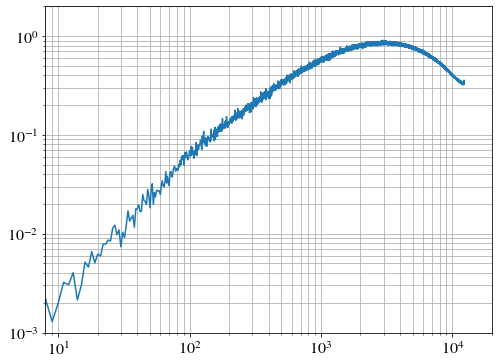

In [35]:
ls_ws = np.arange(0,len(cls))
plt.plot(ls_ws,ls_ws*(ls_ws+1.)/2./np.pi*cls_ws*1e12)
plt.xscale('log')
plt.yscale('log')
plt.ylim(1e-3,2.)
plt.xlim(8.,2.e4)
plt.grid(which='both')

In [3]:
common_settings = {
                   # LambdaCDM parameters
#                    'h':0.67556,
#                    'omega_b':0.022032,
#                    'omega_cdm':0.12038,
#                    'A_s':2.215e-9,
#                    'tau_reio':0.0925,
                   # Take fixed value for primordial Helium (instead of automatic BBN adjustment)
#                    'YHe':0.246,
                   'mass function' : 'T08', 
#                    'units for tSZ spectrum':'muK2'
}

# copied from : https://github.com/simonsobs/websky_model/blob/a93bbf758432a936c0ec2b59775683b695d3d191/websky_model/websky.py#L55
websky_Omega_M = 0.31
websky_Omega_B = 0.049
websky_Omega_L = 0.69
websky_h = 0.68
websky_sigma_8 = 0.81
websky_n_s = 0.965


websky_cosmo = {
    'omega_b': websky_Omega_B*websky_h**2.,
    'omega_cdm': (websky_Omega_M-websky_Omega_B)*websky_h**2.,
    'h': websky_h,
    'tau_reio': 0.0543,
    'sigma8': websky_sigma_8,
    'n_s': websky_n_s, 
    'use_websky_m200m_to_m200c_conversion': 1
}

M = Class()
M.set(common_settings)
M.set(websky_cosmo)
M.set({# class_sz parameters:
       'output':'tSZ_1h,tSZ_2h',
       'pressure profile': 'B12',  # check source/input.c for default parameter values of Battaglia et al profile (B12)
       'concentration parameter': 'D08',  # B13: Bhattacharya et al 2013  
       'ell_max' : 10000,
       'ell_min' : 2,
       'z_min': 1e-8,
       'z_max': 4.,
       'M_min':1e12, # all masses in Msun/h
       'M_max':5e15,
       #'B': 1.7, #hydrostatic equilibrium bias (1-b)^-1
       'units for tSZ spectrum': 'dimensionless',
        'n_ell_pressure_profile' : 70,
        'n_m_pressure_profile' : 70,
        'n_z_pressure_profile' : 300,
    'x_outSZ': 4.,
    'truncate_wrt_rvir':0,
    'hm_consistency':0
        })
        
M.compute()
cl_sz = M.cl_sz()
M.struct_cleanup()
M.empty()

In [4]:
M = Class()
M.set(common_settings)
M.set(websky_cosmo)
M.set({# class_sz parameters:
       'output':'tSZ_1h,tSZ_2h',
       'pressure profile': 'A10',  # check source/input.c for default parameter values of Battaglia et al profile (B12)
       'concentration parameter': 'D08',  # B13: Bhattacharya et al 2013  
       'ell_max' : 10000,
       'ell_min' : 2,
       'z_min': 1e-8,
       'z_max': 4.,
       'M_min':1e12, # all masses in Msun/h
       'M_max':5e15,
       'B': 1.2, #hydrostatic equilibrium bias (1-b)^-1
       'units for tSZ spectrum': 'dimensionless',
        'n_ell_pressure_profile' : 70,
        'n_m_pressure_profile' : 70,
        'n_z_pressure_profile' : 300,
    'x_outSZ': 1.,
    'truncate_wrt_rvir':0,
    'hm_consistency':0
        })
        
M.compute()
cl_sz_a10 = M.cl_sz()
M.struct_cleanup()
M.empty()

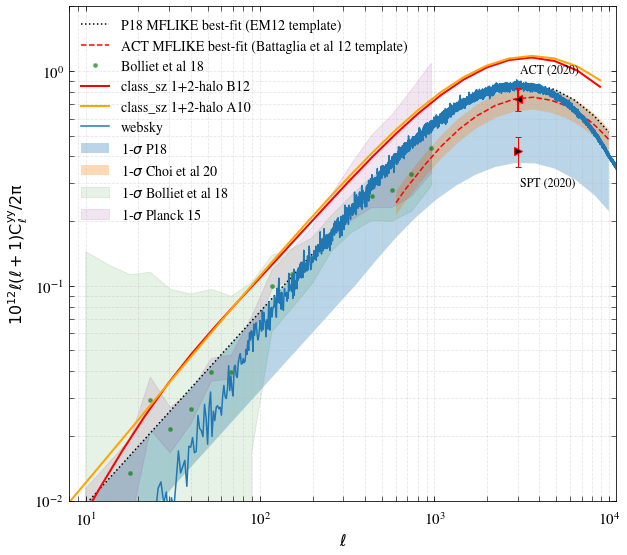

In [5]:
label_size = 15
title_size = 16
legend_size = 16
handle_length = 2
y_min = 1.e-2
y_max = 2

fig, ax1 = plt.subplots(1,1,figsize=(9,8))

ax = ax1
ax.tick_params(axis = 'x',which='both',length=5,direction='in', pad=10)
ax.tick_params(axis = 'y',which='both',length=5,direction='in', pad=5)
ax.xaxis.set_ticks_position('both')
ax.yaxis.set_ticks_position('both')
plt.setp(ax.get_yticklabels(), rotation='horizontal', fontsize=label_size)
plt.setp(ax.get_xticklabels(), fontsize=label_size)
ax.grid( b=True, which="both", alpha=0.3, linestyle='--')

ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlabel(r'$\ell$',size=title_size)

ax.set_ylabel(r'$10^{12}\ell(\ell+1)\mathrm{C^{yy}_\ell/2\pi}$',size=title_size)


PSZ = np.loadtxt(path_to_files+'tsz_143_eps0.50.dat')
B12 = np.loadtxt(path_to_files+'cl_tsz_150_bat.dat')

pow_planck = interp1d(PSZ[:,0],PSZ[:,1])
tsz_planck = PSZ[:,1]
tsz_planck = 1e12*tsz_planck/fsz(143)/fsz(143)/pow_planck(3000)
A_sz_planck_mean = 5.
A_sz_planck_sigma = 2.
A_sz_planck_best_fit = 7.

plt.plot(PSZ[:,0],A_sz_planck_best_fit*tsz_planck,label='P18 MFLIKE best-fit (EM12 template)',c='k',ls=':')
plt.fill_between(PSZ[:,0],(A_sz_planck_mean-A_sz_planck_sigma)*tsz_planck,(A_sz_planck_mean+A_sz_planck_sigma)*tsz_planck,alpha=0.3,label = r'1-$\sigma$ P18')


tsz_B12 = B12[:,1]
pow_b12 = interp1d(B12[:,0],tsz_B12)
tsz_B12 = 1e12*tsz_B12/pow_b12(3000)/fsz(148)/fsz(148)
# tsz_B12 = 1e12*tsz_B12/pow_b12(3000)/(2.67e6)**2
pow_tsz_b12 = interp1d(B12[:,0],tsz_B12)
A_sz_act_mean = 5.29
A_sz_act_sigma = 0.66
A_sz_act_best_fit = 5.29
# A_sz_act_best_fit = 1.

plt.plot(B12[:,0][600:],A_sz_act_best_fit*tsz_B12[600:],label='ACT MFLIKE best-fit (Battaglia et al 12 template)',c='r',ls='--')
plt.fill_between(B12[:,0][600:],(A_sz_act_mean-A_sz_act_sigma)*tsz_B12[600:],(A_sz_act_mean+A_sz_act_sigma)*tsz_B12[600:],alpha=0.3,label = r'1-$\sigma$ Choi et al 20')


ACTCellnew = 5.29/(2.67)**2
ACTCellnewerr =	0.66/(2.67)**2

SPTCellnew = 3.42/(2.84)**2
SPTCellnewerr = 0.54/(2.84)**2

ax.errorbar([3000],[SPTCellnew],
            yerr=[SPTCellnewerr],capthick=1,capsize=3,elinewidth=1,\
             fmt='>',mfc='k',markersize=8,color = 'r')

ax.errorbar([3000],[ACTCellnew],
            yerr=[ACTCellnewerr],capthick=1,capsize=3,elinewidth=2,\
             fmt='<',mfc='k',markersize=8,color = 'r',zorder=100)
ax.text(3.1e3, 3.e-1, 'SPT (2020)', fontsize=12,rotation = 0,
verticalalignment='center',horizontalalignment='left')
ax.text(3.1e3, 1.01e0, 'ACT (2020)', fontsize=12,rotation = 0,
verticalalignment='center',horizontalalignment='left')



P = np.loadtxt(path_to_files+'planck_sz_1712_00788v1.txt')
# ax.errorbar(P[:,0][0:18],P[:,1][0:18],yerr = P[:,2][0:18],color='green',linestyle="None",alpha = .5,label = 'B18',marker='o',markersize=3,capsize=5,elinewidth=2,markeredgewidth=2)
ax.plot(P[:,0][0:18],P[:,1][0:18],color='green',linestyle="None",alpha = .5,label = 'Bolliet et al 18',marker='o',markersize=3,markeredgewidth=2)
ax.fill_between(P[:,0][0:18],P[:,1][0:18]-P[:,2][0:18],P[:,1][0:18]+P[:,2][0:18],
color='green',alpha=0.1,label=r'1-$\sigma$ Bolliet et al 18')

P = np.loadtxt(path_to_files+'Planck2015.txt')
# ax.errorbar(P[:,0][0:18],P[:,1][0:18],yerr = P[:,4][0:18],color='purple',linestyle="None",alpha = .2,label = 'P15',marker='o',markersize=3,capsize=5,elinewidth=2,markeredgewidth=2)
# ax.plot(P[:,0][0:18],P[:,1][0:18],color='purple',linestyle="None",alpha = .2,label = 'P15',marker='o',markersize=3,markeredgewidth=2)
ax.fill_between(P[:,0][0:18],P[:,1][0:18]-P[:,4][0:18],P[:,1][0:18]+P[:,4][0:18],
color='purple',alpha=0.1,label=r'1-$\sigma$ Planck 15')

#plt.loglog(np.asarray(cl_sz['ell']),np.asarray(cl_sz['1h']),'k-.',label=r'class_sz 1-halo')
#plt.loglog(np.asarray(cl_sz['ell']),np.asarray(cl_sz['2h']),'b-.',label=r'class_sz 2-halo')
plt.loglog(np.asarray(cl_sz['ell']),(np.asarray(cl_sz['1h'])+np.asarray(cl_sz['2h']))/1.,c='r',lw=2,label=r'class_sz 1+2-halo B12')

plt.loglog(np.asarray(cl_sz_a10['ell']),(np.asarray(cl_sz_a10['1h'])+np.asarray(cl_sz_a10['2h']))/1.,c='orange',lw=2,label=r'class_sz 1+2-halo A10')


ls_ws, dls_ws =np.loadtxt(path_to_files+'cl_yy_websky_l_dl.txt',unpack=True)
plt.plot(ls_ws,dls_ws*1e12,label='websky')


ax.set_ylim(y_min,y_max)
ax.legend(loc=2,ncol=1,fontsize=14,frameon=False)
    
plt.xlim(8,1.1e4)
fig.tight_layout()

In [65]:
# np.savetxt('/Users/boris/Work/CLASS-SZ/SO-SZ/class_sz/sz_auxiliary_files/cl_yy_websky_l_1e12dl.txt',np.c_[ls_ws,ls_ws*(ls_ws+1.)/2./np.pi*cls_ws])

In [6]:
import healpy as hp

omegab = websky_Omega_B
omegac = websky_Omega_M-websky_Omega_B
omegam = omegab + omegac
h      = websky_h
ns     = websky_n_s
sigma8 = websky_sigma_8

c = 3e5

H0 = 100*h
nz = 100000
z1 = 0.0
z2 = 6.0
za = np.linspace(z1,z2,nz)
dz = za[1]-za[0]

H      = lambda z: H0*np.sqrt(omegam*(1+z)**3+1-omegam)
dchidz = lambda z: c/H(z)

chia = np.cumsum(dchidz(za))*dz

zofchi = interp1d(chia,za)

# from   cosmology import *
def makeACTName(RADeg, decDeg, prefix = 'ACT-CL'):
    """Makes ACT cluster name from RADeg, decDeg
    
    """
    
    actName=prefix+" J"+makeRA(RADeg)+makeDec(decDeg)
    
    return actName

def makeRA(myRADeg):
    """Makes RA part of ACT names.
    
    """
    hours=(myRADeg/360)*24
    if hours<10:
        sHours="0"+str(hours)[0]
    else:
        sHours=str(hours)[:2]
    
    mins=float(str(hours)[str(hours).index("."):])*60
    if mins<10:
        sMins="0"+str(mins)[:3]
    else:
        sMins=str(mins)[:4]
        
    return (sHours+sMins)#[:-2] # Trims off .x as not used in ACT names
        
#------------------------------------------------------------------------------------------------------------
def makeDec(myDecDeg):
    """Makes dec part of ACT names
    
    """
    
    # Positive
    if myDecDeg>0:
        if myDecDeg<10:
            sDeg="0"+str(myDecDeg)[0]
        else:
            sDeg=str(myDecDeg)[:2]
    
        mins=float(str(myDecDeg)[str(myDecDeg).index("."):])*60
        if mins<10:
            sMins="0"+str(mins)[:1]
        else:
            sMins=str(mins)[:2]
        
        return "+"+sDeg+sMins
    else:
        if myDecDeg>-10:
            sDeg="-0"+str(myDecDeg)[1]
        else:
            sDeg=str(myDecDeg)[:3]
    
        mins=float(str(myDecDeg)[str(myDecDeg).index("."):])*60
        if mins<10:
            sMins="0"+str(mins)[:1]
        else:
            sMins=str(mins)[:2]
        
        return str(sDeg+sMins)

omegam = M.Omega_m()
h = M.h()
rho = 2.775e11*omegam*h**2 # Msun/Mpc^3
path_to_catalogue_websky = '/Users/boris/Work/CLASS-SZ/SO-SZ/so_cluster_counts/'
f=open(path_to_catalogue_websky+'halos.pksc')
N=np.fromfile(f,count=3,dtype=np.int32)[0]

# only take first five entries for testing (there are ~8e8 halos total...)
# comment the following line to read in all halos
# ordered by decreasing mass
N = 800000
# N = 862923142

catalog=np.fromfile(f,count=N*10,dtype=np.float32)
catalog=np.reshape(catalog,(N,10))

x  = catalog[:,0];  y = catalog[:,1];  z = catalog[:,2] # Mpc (comoving)
vx = catalog[:,3]; vy = catalog[:,4]; vz = catalog[:,5] # km/sec
R  = catalog[:,6] # Mpc

# convert to mass, comoving distance, radial velocity, redshfit, RA and DEc
M200m    = 4*np.pi/3.*rho*R**3        # this is M200m (mean density 200 times mean) in Msun
chi      = np.sqrt(x**2+y**2+z**2)    # Mpc
vrad     = (x*vx + y*vy + z*vz) / chi # km/sec
redshift = zofchi(chi)      

theta, phi  = hp.vec2ang(np.column_stack((x,y,z))) # in radians

decDeg=-1*(np.degrees(theta)-90) # Because HEALPix
RADeg=np.degrees(phi)


### e.g. project to a map, matching the websky orientations
#nside = 1024
#map   = np.zeros((hp.nside2npix(nside)))

#pix = hp.vec2pix(nside, x, y, z)
#pix = hp.ang2pix(nside, theta, phi) does the same

#weight = 1. #1 for number density, array of size(x) for arbitrary
#np.add.at(map, pix, weight)

In [7]:
M = Class()
M.set(websky_cosmo)
has_selfn = 0
snrcut = 6.
M.set({
          'non linear': 'halofit',
#           'output' :'sz_cluster_counts,m200m_to_m500c',
          'output' :'sz_cluster_counts, m200m_to_m500c,m200m_to_m200c',
          'mass function' : 'T08',
          #'integrate_wrt_m200m' : 1,
          'concentration parameter': 'D08',
          'has_selection_function' : has_selfn,
          'sky area in deg2': 41253.,
#     'sky area in deg2': 599.,
          'experiment' : 1, # simons observatory 1
          'y_m_relation' : 1,
          'signal-to-noise cut-off for survey cluster completeness' : snrcut,
#           'SO_skyfracs_file': "/sz_auxiliary_files/so_3freqs_120921_pass2_skyfracs.txt",
#           'SO_ylims_file': "/sz_auxiliary_files/so_3freqs_120921_pass2_ylims.txt",
#           'SO_thetas_file': "/sz_auxiliary_files/so_3freqs_120921_pass2_thetas.txt",

          'M_min' : 1.0e10,#*websky_h, # bounds in websky:8.06216e+13 2.35569e+15, in matt's file m200mUncorr in Msun/h:1.11329e+14 2.17657e+15, Upp: 9.70934e+13 2.17039e+15
          'M_max' : 2.35569e+15,
          'B': 1.,

          'N_ur': 2.0328,
          'N_ncdm': 1,
          'm_ncdm': 0.0,
          'T_ncdm': 0.71611,
          'input_verbose' : 0,
          'background_verbose': 0,
          'perturbations_verbose': 0,
          'sz_verbose'  : 0,

          'bin_z_min_cluster_counts' : 0.,
          'bin_z_max_cluster_counts' : 2.,
          'bin_dz_cluster_counts' : 0.1,
          'bin_dlog10_snr': 0.25,

          'dlny' : 0.01,
          'lnymin' : -13., # planck  -11.5 so -11
          'lnymax' : -3.,  # planck 10. so -5
          'dlnM_cluster_count_completeness_grid' : 0.005,


          'cluster_count_completeness_grid_z_cutoff_low' : 0.4,
          'cluster_count_completeness_grid_z_cutoff_mid' : 1.,

          'dz_cluster_count_completeness_grid_low_z' : 1e-3,
          'dz_cluster_count_completeness_grid_mid_z' : 1e-2,
          'dz_cluster_count_completeness_grid_high_z' : 1e-1,



          'mass_epsrel_cluster_counts' : 1e-6,
          'mass_epsabs_cluster_counts' : 1e-40,

          'redshift_epsrel_cluster_counts' : 1e-4,
          'redshift_epsabs_cluster_counts' : 1e-40,
    #a=4.56036e-01 b=-3.869082e-02
          'A_ym': 4.35e-05,#4.35e-05,#4.68912e-05,#4.35e-05,#4.62e-05,#A_ym_websky,4.68912e-05 b=1.054969e+00
          'B_ym':0.08,#0.08,#5.496869e-02, #0.08, #B_ym_websky,
          'C_ym' : 0.,
          'sigmaM_ym' : 0.,
    

#           # # tabulation of mass function:
          'n_z_dndlnM' : 200,
          'n_m_dndlnM' : 200,
#           #
#           # # computation of mass function
#           # # (grid in mass and redshifts for sigma and dsigma)
          'ndim_masses' : 200,
          'ndim_redshifts' : 200,

#           # pk setup for computation of sigma and dsigma
    
          'k_per_decade_class_sz' : 40., #important parameter
          'k_min_for_pk_class_sz' : 1e-4,
          'k_max_for_pk_class_sz' : 10.,

          'P_k_max_h/Mpc' : 2e1
    
})
M.compute()
print(M.sigma8())
print(M.get_sigma8_at_z(0.0002))
# print(M.get_sigma8_at_z(0.0))

0.8100000957137263
0.8103065815754312


In [8]:
dNdzdy_theoretical = M.dndzdy_theoretical()['dndzdy']
z_center = M.dndzdy_theoretical()['z_center']
z_edges = M.dndzdy_theoretical()['z_edges']
log10y_center = M.dndzdy_theoretical()['log10y_center']
log10y_edges = M.dndzdy_theoretical()['log10y_edges']

In [9]:
z = redshift
len(z)
z.min()
z.max()
# z_min = 1e-7
# z_max = 4.
# z_edges = np.linspace(z_min,z_max,10)
z_min = min(z_edges)
z_max = max(z_edges)
print(z_min,z_max)
z_edges = np.asarray(z_edges)
z_center = (z_edges[:-1] + z_edges[1:])/2.
z_center

1.0000000000003062e-05 2.0


array([0.050005, 0.15    , 0.25    , 0.35    , 0.45    , 0.55    ,
       0.65    , 0.75    , 0.85    , 0.95    , 1.05    , 1.15    ,
       1.25    , 1.35    , 1.45    , 1.55    , 1.65    , 1.75    ,
       1.85    , 1.95    ])

In [10]:
m200_min = M200m.min()*h
m200_max = M200m.max()*h
print('%.5e'%m200_min,'%.5e'%m200_max)
m_edges = np.linspace(np.log(m200_min),np.log(m200_max),50)
m_center = (m_edges[:-1] + m_edges[1:])/2.
m_center

8.06216e+13 2.35569e+15


array([32.05522466, 32.12409863, 32.19297259, 32.26184656, 32.33072052,
       32.39959449, 32.46846846, 32.53734242, 32.60621639, 32.67509035,
       32.74396432, 32.81283829, 32.88171225, 32.95058622, 33.01946019,
       33.08833415, 33.15720812, 33.22608208, 33.29495605, 33.36383002,
       33.43270398, 33.50157795, 33.57045191, 33.63932588, 33.70819985,
       33.77707381, 33.84594778, 33.91482174, 33.98369571, 34.05256968,
       34.12144364, 34.19031761, 34.25919158, 34.32806554, 34.39693951,
       34.46581347, 34.53468744, 34.60356141, 34.67243537, 34.74130934,
       34.8101833 , 34.87905727, 34.94793124, 35.0168052 , 35.08567917,
       35.15455314, 35.2234271 , 35.29230107, 35.36117503])

In [11]:
nms = 1000
nzs = 2000
lnms = np.linspace(np.log(m200_min*1.000001),np.log(m200_max*0.99999),nms)
zs = np.linspace(z_min,z_max,nzs)

# masses in rows
# redshifts in column
# sum over rows -> axis 0 (1st dimension)
# sum over columns -> axis 1 (2nd dimension)
dndmdz = np.zeros((nms,nzs))

for (im,mm) in enumerate(lnms):
    dndmdz[im,:] = np.vectorize(M.get_volume_dVdzdOmega_at_z)(zs)*np.vectorize(M.get_dndlnM_at_z_and_M)(zs,np.exp(mm))
    # integrate over massses at each z:
dndz = np.trapz(dndmdz,x=lnms,axis=0)
nz = np.zeros((len(z_center)))

for (iz,zz) in enumerate(z_center): 
    filter_bin = (zs>z_edges[iz]) & (zs<z_edges[iz+1])
    nz[iz] = 4.*np.pi*np.trapz(dndz[filter_bin],x=zs[filter_bin] )

    

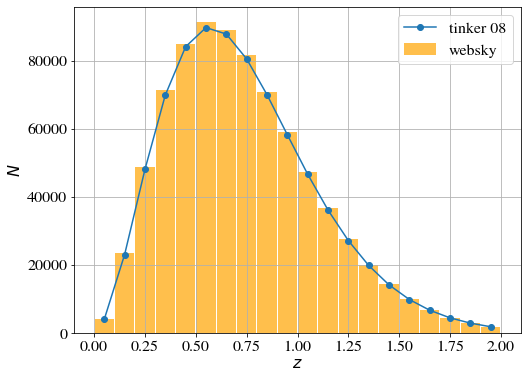

In [12]:
N_clusters_z, xedges = np.histogram(z, bins=z_edges)
# plt.errorbar(z_center,N_clusters_z,yerr=np.sqrt(N_clusters_z),marker='o',markersize=3.,ls='none',label='catalogue data',capsize=5,c='k')
#plt.hist(z_center,N_clusters_z_theory,marker='o',markersize=3.,ls=':',label='theory',c='orange')
n, bins, patches = plt.hist(x=np.repeat(z_center,
                                        N_clusters_z), 
                            bins=z_edges, 
                            color='orange',
                            alpha=0.7, 
                            rwidth=0.95,
                            label='websky')
plt.plot(z_center,nz,label='tinker 08',marker='o')
# n, bins, patches = plt.hist(x=np.repeat(z_center,
#                                         nz), 
#                             bins=z_edges, 
#                             color='orange',
#                             alpha=0.7, 
#                             rwidth=0.95,
#                             label='Tinker')

# n, bins, patches = plt.hist(x=np.repeat(z_center,N_clusters_z_theory), bins=z_edges, color='blue',alpha=0.7, rwidth=0.95,label=r'SO (~$10^{4}$) - class_sz')



plt.grid()
plt.legend(loc=1)
plt.xlabel(r'$z$')
plt.ylabel(r'$N$')
plt.yscale('linear')
plt.show()

In [13]:
# range of integration of the reduced pressure profile:
x= np.logspace(-8,2,1000)
m200c_pivot = 1e14*M.h() # [Msun/h]

def E(zp):
    return M.Hubble(zp)/M.Hubble(0.)
vec_get_dy_classy_battaglia = np.vectorize(M.get_1e6xdy_from_battaglia_pressure_at_x_z_and_m200c)

def y_over_Ez2_over_mfid_battaglia_at_m_and_z_theta(m_over_m_pivot_200c,thetap,z):

    m200c = m_over_m_pivot_200c*m200c_pivot
    theta_over_theta_200c = thetap

    
    pp_battaglia = []
    #for xx in x:
        #pp_gnfw.append(M.get_1e6xdy_from_gnfw_pressure_at_x_z_and_m500c(np.sqrt(xx**2+theta_over_theta_500**2),z,m))
    pp_battaglia = vec_get_dy_classy_battaglia(np.sqrt(x**2+theta_over_theta_200c**2),z,m200c)
    # factor 2: s = 0 to smax instead of -smax to smax in the los integration
    norm_battaglia = 2.*np.trapz(pp_battaglia, x=x)/E(z)**2*1e-6/m_over_m_pivot_200c
    return norm_battaglia
vec_y_battaglia = np.vectorize(y_over_Ez2_over_mfid_battaglia_at_m_and_z_theta)

def x200c_to_theta_arcmin(X):
    return M.get_rad_to_arcmin(r200c*X/M.get_dA(z))
def theta_arcmin_to_x200c(X):
    theta_rad = M.get_arcmin_to_rad(X)
    r = M.get_dA(z)*theta_rad
    return r/r200c

In [26]:
n_th = 80
th_array = np.geomspace(0.01,3.,n_th) # this theta/theta200c
M200m_test=1e14*M.h() # [Msun/h] 
z_test=0.01
M200c_test = M.get_m200m_to_m200c_at_z_and_M(z_test,M200m_test)
print('z=%.5e m200m=%.5e Msun m200c=%.5e Msun'%(z_test,M200m_test/M.h(),M200c_test/M.h()))

# dimensonfull radial array:
r200c = M.get_r_delta_of_m_delta_at_z(200,M200c_test,z_test)
theta200c_rad = r200c/M.get_dA(z_test)
theta200c_arcmin = M.get_rad_to_arcmin(theta200c_rad)


z=1.00000e-02 m200m=1.00000e+14 Msun m200c=6.68486e+13 Msun


In [30]:
r200c

0.5786410174876747

Text(0.5, 1.0, 'z=1.00000e-02 m200m=1.00000e+14 Msun m200c=6.68486e+13 Msun')

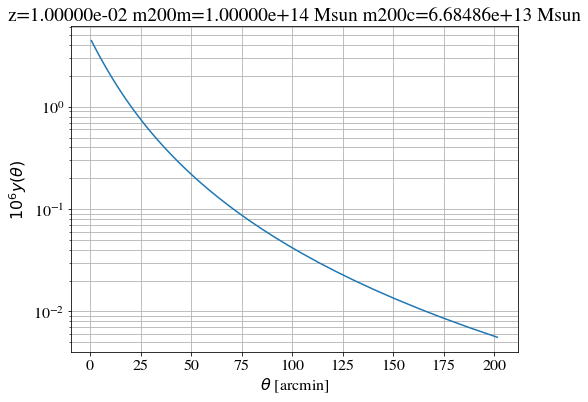

In [27]:
plt.plot(M.get_rad_to_arcmin(th_array*theta200c_rad),1e6*vec_y_battaglia(M200c_test/m200c_pivot,th_array,z_test)*E(z_test)**2*M200c_test/m200c_pivot)
plt.xlabel(r'$\theta$ [arcmin]')
plt.ylabel(r'$10^{6}y(\theta)$')
plt.grid(which='both')
plt.yscale('log')
plt.title('z=%.5e m200m=%.5e Msun m200c=%.5e Msun'%(z_test,M200m_test/M.h(),M200c_test/M.h()))

In [28]:
th_arcmin_to_print = M.get_rad_to_arcmin(th_array*theta200c_rad)
y_to_print = 1e6*vec_y_battaglia(M200c_test/m200c_pivot,th_array,z_test)*E(z_test)**2*M200c_test/m200c_pivot

In [29]:
np.savetxt('/Users/boris/Work/CLASS-SZ/SO-SZ/websky_ymap/class_vs_websky_yprofile/for_marcelo_B12_thetaarcmin_1e6y_z1_m200m1e14_webskycosmo.txt',np.c_[th_arcmin_to_print,y_to_print])